<b> Федеральное государственное бюджетное образовательное учреждение высшего образования <br>
    «РОССИЙСКАЯ АКАДЕМИЯ НАРОДНОГО ХОЗЯЙСТВА И ГОСУДАРСТВЕННОЙ СЛУЖБЫ ПРИ ПРЕЗИДЕНТЕ РОССИЙСКОЙ ФЕДЕРАЦИИ»</b>

<b> НИЖЕГОРОДСКИЙ ИНСТИТУТ УПРАВЛЕНИЯ – филиал РАНХиГС </b>

Факультет управления<br>
Кафедра Информатики и информационных технологий<br>
Направление подготовки / специальность: 09.04.03 Прикладная информатика<br>
Направленность (профиль) / специализация: Корпоративные информационные системы управления.<br>

<b>Отчет по лабораторным работам</b>

по дисциплине:    Структуры данных и их использование в программировани
	
<b>АВТОР</b><br>
Обучающийся(иеся) 2 курса группы ИК-722<br>
заочной формы обучения<br>
<b>Рулёв Владислав Дмитриевич</b><br>



<b>РУКОВОДИТЕЛЬ</b> <br>
Кандидат физико-математических наук<br>
(ученая степень, ученое звание)<br>
оценка ______ <br>
«_____» __________________ 2024 г.<br>
(дата защиты)<br>
____________                          Орлов М.Л.<br>
(подпись)                                       (фамилия, инициалы)



Нижний Новгород, 2024г. 


## Задание 1:
### Написать единую программу на языке высокого уровня (С++, C#, Java), реализующую сортировку массива, заполненного случайными числами в диапазоне от 0 до 100, различными методами. Провести сравнительный анализ временной эффективности реализованных методов. 
### Должны быть реализованы следующие методы сортировки:
<ul>
<li>Сортировка методом прямого обмена (сортировка методом пузырька).</li>
<li>Сортировка методом прямого включения.</li> 
<li>Сортировка методом прямого выбора.</li> 
<li>Шейкерная сортировка.</li> 
<li>Сортировка методом Шелла.</li> 
<li>Сортировка методом Хоара.</li>
</ul>

In [1]:
from random import randint

### Сортировка пузыркьками

O(n²), где n — количество элементов списка.

In [13]:
def bubbles(numbers):      

    for i in range(len(numbers) - 1):
        for j in range(len(numbers) - i - 1):
            if numbers[j] > numbers[j + 1]:

                temp = numbers[j] 
                numbers[j] = numbers[j + 1]
                numbers[j + 1] = temp

    return numbers

##### Сортировка методом прямого включения

O(n²), где n — количество элементов списка.

In [19]:
def direct_activation(numbers):      
    for i in range(1, len(numbers)): 
        value = numbers[i] 
        j = i - 1 
        while j >= 0 and value < numbers[j]: 
            numbers[j + 1] = numbers[j] 
            j -= 1 
        numbers[j + 1] = value 
    return numbers 

##### Сортировка методом прямого выбора

O(n²), где n — количество элементов списка.

In [33]:
def direct_selection(numbers):
    for i in range(len(numbers)):
        min_idx = i
        for j in range(i + 1, len(numbers)):
            if numbers[j] < numbers[min_idx]:
                min_idx = j
        temp = numbers[i]
        numbers[i] = numbers[min_idx]
        numbers[min_idx] = temp
    return numbers

##### Шейкерная сортировка

O(n²), где n — количество элементов списка.

In [34]:
def shaiker(numbers):
    
    left_index = 1
    right_index = len(numbers)
    
    while left_index < right_index:
        for i in range(left_index, right_index):
            
            if numbers[i] < numbers[i-1]:
                temp = numbers[i] 
                numbers[i] = numbers[i-1]
                numbers[i-1] = temp
                
            if numbers[right_index - i] < numbers[right_index - i -1]:
                temp = numbers[right_index - i]
                numbers[right_index - i] = numbers[right_index - i -1]
                numbers[right_index - i - 1] = temp
        
        left_index += 1
        right_index -= 1

    return numbers

##### Сортировка Шелла

O(n²), где n — количество элементов списка.

In [23]:
def shell(numbers):
    step = len(numbers) // 2
    
    while step > 0:
        for i in range(step, len(numbers)):
            value = numbers[i]
            j = i
            while j >= step and numbers[j - step] > value:
                numbers[j] = numbers[j - step]
                j -= step
            numbers[jdx] = value
        step //= 2
    
    return numbers

##### Сортировка Хоара

O(n²), где n — количество элементов списка.

In [22]:
from random import choice

def hoar(numbers):
    if len(numbers) <= 1:
        return numbers
    else:
        q = choice(numbers)
        s_nums = []
        m_nums = []
        e_nums = []
        for number in numbers:
            if number < q:
                s_nums.append(number)
            elif number > q:
                m_nums.append(number)
            else:
                e_nums.append(number)
    return hoar(s_nums) + e_nums + hoar(m_nums)

In [25]:
!pip install tqdm

     ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
     --------------- ------------------------ 30.7/78.3 kB ? eta -:--:--
     ------------------- ------------------ 41.0/78.3 kB 653.6 kB/s eta 0:00:01
     ------------------- ------------------ 41.0/78.3 kB 653.6 kB/s eta 0:00:01
     ------------------- ------------------ 41.0/78.3 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 78.3/78.3 kB 333.6 kB/s eta 0:00:00


In [26]:
import pandas as pd
from time import time
from tqdm import tqdm
import matplotlib.pyplot as plt

# Список функий
list_sort = [bubbles, direct_activation, direct_selection, shaiker, shell, hoar]

# Список количества элементов 
sizes = [100, 1000, 5000]

# создаем датафрейм
stat_df = pd.DataFrame(columns=['count_elements', 'name_sort_func', 'time'])

In [27]:
for size in tqdm(sizes):
    list_numbers = [randint(0, 100) for i in range(size)]
    for func in list_sort:
        name_func = str(func).split()[1]
        time_st = time()
        rez = func(list_numbers)
        dif_time = time() - time_st
        
        stat_df.loc[len(stat_df.index)] = [size, name_func, dif_time]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.30s/it]


In [31]:
stat_df

,count_elements,name_sort_func,time
0,100,bubbles,0.003997
1,100,direct_activation,0.000000
2,100,direct_selection,0.000000
3,100,shaiker,0.000000
4,100,shell,0.000000
5,100,hoar,0.000000
6,1000,bubbles,0.169260
7,1000,direct_activation,0.000000
8,1000,direct_selection,0.096306
9,1000,shaiker,0.120024


In [30]:
group_df = stat_df.groupby('name_sort_func').agg({'time':['mean']}).reset_index()
group_df.columns = group_df.columns.droplevel(1)
group_df = group_df.sort_values('time', ascending=False)
group_df.head()

,name_sort_func,time
0,bubbles,1.516002
4,shaiker,1.059064
2,direct_selection,0.691165
5,shell,0.005209
3,hoar,0.002667


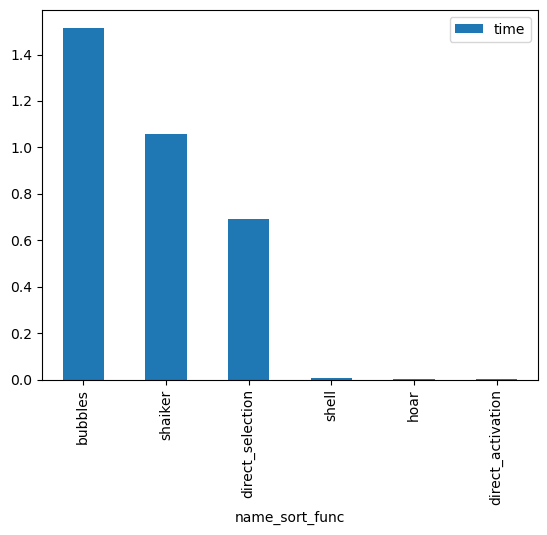

In [32]:
group_df.plot(x="name_sort_func", y="time", kind="bar", fontsize=10)
plt.show()